In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%matplotlib inline

df = pd.read_csv(r"C:\Users\castw\Desktop\Equity_Apartments_Data.csv")
df.head()
df.shape

(62810, 32)

In [2]:
#Cleaning
df.drop(columns = ['Unnamed: 0','URL','Day_of_the_week_recorded','Unique_ID', 'unit_id'], inplace = True)
df.rename(columns = {'Estiamted_Vacancy':'Estimated Vacancy'}, inplace = True)
df_predict = df.drop(columns = ['Move_in_date','Day_Recorded','City','Address','building_id','Days_Till_Available']) # drops for regression
df_predict.head()

,Price,Beds,Baths,sq.ft,Floor,Amenity,Apartment Name,Units,Northern_Exposure,Southern_Exposure,Eastern_Exposure,Western_Exposure,Balcony,Walk_In_Closet,Fireplace,City_Skyline,Kitchen_Island,Stainless_Appliances,Renovated,Office_Space,Estimated Vacancy
0,2377,0,1.0,523,5,Hard Surface Flooring Throughout\r\r\n ...,1210 Mass Apartments,144,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.020833
1,2816,1,1.0,713,2,Beautiful Bay Windows\r\r\n ...,1210 Mass Apartments,144,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.020833
2,3811,2,2.0,1252,6,Gas Fireplace\r\r\n ...,1210 Mass Apartments,144,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.020833
3,1549,0,1.0,456,2,Northern Exposure\r\r\n ...,1500 Mass Apartments,556,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003597
4,1753,1,1.0,580,3,Southern Exposure\r\r\n ...,1500 Mass Apartments,556,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003597


In [3]:
#Ordinal Encoding

#Create Address Dictionary
address = []
cnt = 0
for i in range(0, len(df_predict['Apartment Name'])):
    if df_predict['Apartment Name'][i] not in address: 
        address.append(df_predict['Apartment Name'][i]) 
        cnt += 1
        num = 0

values = []
nums = []
for i in range (0, len(address)):
    values.append([address[i], num])
    nums.append(num)
    num +=1

apt_dict = dict(zip(address,nums))        


#Create Amenities Dictionary
amenities = []
cnt_am = 0
for i in range(0, len(df_predict['Amenity'])):
    
    if df_predict['Amenity'][i] not in amenities: 
        
        amenities.append(df_predict['Amenity'][i])
          
        cnt_am += 1

num2 = 0
values2 = []
nums2 = []
for i in range (0, len(amenities)):
    values2.append([amenities[i], num2])
    nums2.append(num2)
    num2 +=1

amen_dict = dict(zip(amenities,nums2))        



#Update Dataframe for ordinal encoding

apts = df_predict['Apartment Name'].replace(apt_dict)
df_predict['apts'] = apts

amens = df_predict['Amenity'].replace(amen_dict)
#print(amens)
df_predict['amenities'] = amens

df_predict = df_predict.drop(columns = ['Apartment Name','Amenity'])
df_predict.head()
#df_predict.dtypes

,Price,Beds,Baths,sq.ft,Floor,Units,Northern_Exposure,Southern_Exposure,Eastern_Exposure,Western_Exposure,Balcony,Walk_In_Closet,Fireplace,City_Skyline,Kitchen_Island,Stainless_Appliances,Renovated,Office_Space,Estimated Vacancy,apts,amenities
0,2377,0,1.0,523,5,144,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.020833,0,0
1,2816,1,1.0,713,2,144,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.020833,0,1
2,3811,2,2.0,1252,6,144,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.020833,0,2
3,1549,0,1.0,456,2,556,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003597,1,3
4,1753,1,1.0,580,3,556,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003597,1,4


In [4]:
df_predict.isnull().sum()

Price                      0
Beds                       0
Baths                      0
sq.ft                      0
Floor                      0
Units                      0
Northern_Exposure       2491
Southern_Exposure       2491
Eastern_Exposure        2491
Western_Exposure        2491
Balcony                 2491
Walk_In_Closet          2491
Fireplace               2491
City_Skyline            2491
Kitchen_Island          2491
Stainless_Appliances    2491
Renovated               2491
Office_Space            2491
Estimated Vacancy          0
apts                       0
amenities                  0
dtype: int64

In [5]:
df_predict = df_predict.dropna()
df_predict.isnull().sum()

Price                   0
Beds                    0
Baths                   0
sq.ft                   0
Floor                   0
Units                   0
Northern_Exposure       0
Southern_Exposure       0
Eastern_Exposure        0
Western_Exposure        0
Balcony                 0
Walk_In_Closet          0
Fireplace               0
City_Skyline            0
Kitchen_Island          0
Stainless_Appliances    0
Renovated               0
Office_Space            0
Estimated Vacancy       0
apts                    0
amenities               0
dtype: int64

In [6]:
df_predict.corr()

,Price,Beds,Baths,sq.ft,Floor,Units,Northern_Exposure,Southern_Exposure,Eastern_Exposure,Western_Exposure,Balcony,Walk_In_Closet,Fireplace,City_Skyline,Kitchen_Island,Stainless_Appliances,Renovated,Office_Space,Estimated Vacancy,apts,amenities
Price,1.000000,0.455833,0.458404,0.511451,0.376330,-0.117711,0.076524,0.034644,0.050940,0.037104,-0.008306,0.175117,-0.065119,-0.016931,0.007746,0.010724,-0.067820,0.066430,0.150176,0.208653,-0.201770
Beds,0.455833,1.000000,0.818677,0.857291,-0.153375,-0.011798,0.026270,0.064772,0.035308,-0.004550,0.057561,0.038665,0.182757,-0.032544,0.045051,0.007203,0.048198,0.029149,0.073288,0.053822,0.103132
Baths,0.458404,0.818677,1.000000,0.815582,-0.065240,-0.030734,0.052865,0.053773,0.029560,0.012526,0.033975,0.067195,0.173251,-0.004587,0.038600,0.004611,0.023383,0.065794,0.051192,0.062565,0.075514
sq.ft,0.511451,0.857291,0.815582,1.000000,-0.066178,0.049808,0.052236,0.054070,0.042012,0.011664,0.095753,0.071771,0.158775,-0.036503,0.052954,0.078646,-0.006736,0.160487,0.093220,-0.026796,0.106014
Floor,0.376330,-0.153375,-0.065240,-0.066178,1.000000,0.080808,0.036828,-0.032135,0.022917,0.069098,-0.056478,0.054107,-0.149739,0.082955,-0.030759,0.075166,-0.099385,-0.033769,0.117556,-0.041781,-0.211544
Units,-0.117711,-0.011798,-0.030734,0.049808,0.080808,1.000000,0.036888,-0.002224,0.058304,0.046865,0.042611,-0.002169,0.062090,-0.035018,0.041869,0.015984,0.045769,0.034336,-0.249748,-0.047864,0.051246
Northern_Exposure,0.076524,0.026270,0.052865,0.052236,0.036828,0.036888,1.000000,-0.217175,0.020221,0.001503,-0.016794,0.026850,0.050418,-0.054405,-0.005762,0.092127,0.053139,0.060144,-0.049120,0.031772,-0.026002
Southern_Exposure,0.034644,0.064772,0.053773,0.054070,-0.032135,-0.002224,-0.217175,1.000000,0.011915,-0.020288,0.005950,0.037769,0.017516,-0.053173,0.021698,0.042491,0.031852,0.005436,-0.045574,0.013626,0.001114
Eastern_Exposure,0.050940,0.035308,0.029560,0.042012,0.022917,0.058304,0.020221,0.011915,1.000000,-0.244637,0.017351,-0.011855,0.054081,-0.026287,-0.031840,0.054422,0.078307,0.030376,-0.094952,0.001831,-0.008397
Western_Exposure,0.037104,-0.004550,0.012526,0.011664,0.069098,0.046865,0.001503,-0.020288,-0.244637,1.000000,0.004673,-0.009030,0.047778,-0.044984,-0.014814,0.050877,0.067241,0.017529,-0.093348,-0.012446,-0.005031


<AxesSubplot:xlabel='apts', ylabel='Price'>

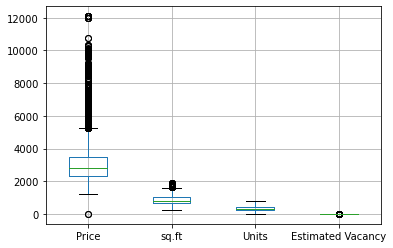

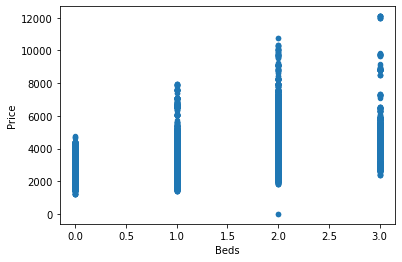

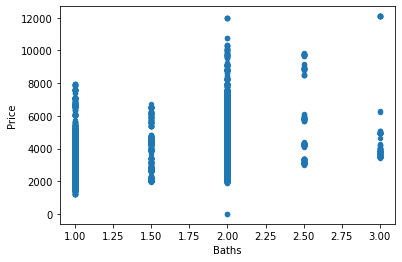

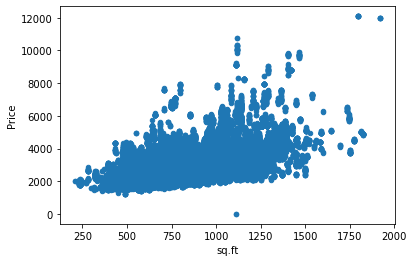

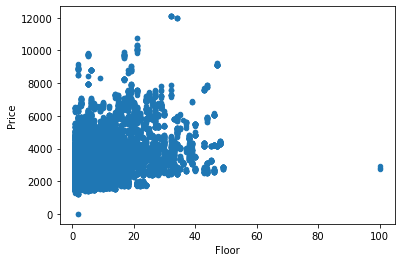

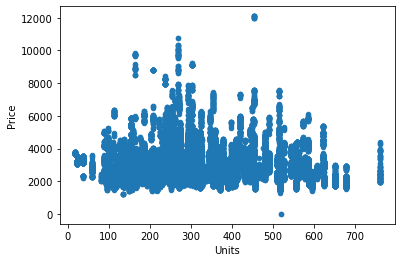

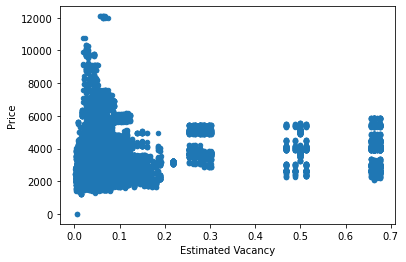

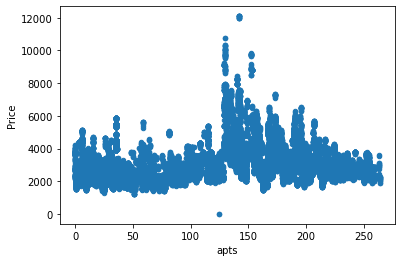

In [7]:
#Box and Scatter Plots
box = df_predict.boxplot(column = ['Price','sq.ft', 'Units','Estimated Vacancy'])
df_predict.plot.scatter(x='Beds', y='Price')
df_predict.plot.scatter(x='Baths', y='Price')
df_predict.plot.scatter(x='sq.ft', y='Price')
df_predict.plot.scatter(x='Floor', y='Price')
df_predict.plot.scatter(x='Units', y='Price')
#df_predict.plot.scatter(x='Northern_Exposure', y='Price')
#df_predict.plot.scatter(x='Southern_Exposure', y='Price')
#df_predict.plot.scatter(x='Eastern_Exposure', y='Price')
#df_predict.plot.scatter(x='Western_Exposure', y='Price')
#df_predict.plot.scatter(x='Balcony', y='Price')
#df_predict.plot.scatter(x='Walk_In_Closet', y='Price')
#df_predict.plot.scatter(x='Fireplace', y='Price')
#df_predict.plot.scatter(x='City_Skyline', y='Price')
#df_predict.plot.scatter(x='Kitchen_Island', y='Price')
#df_predict.plot.scatter(x='Stainless_Appliances', y='Price')
#df_predict.plot.scatter(x='Renovated', y='Price')
#df_predict.plot.scatter(x='Office_Space', y='Price')
df_predict.plot.scatter(x='Estimated Vacancy', y='Price')
df_predict.plot.scatter(x='apts', y='Price')


Entries in df_predict:  60319
Entries in rslt_df:  58108


array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

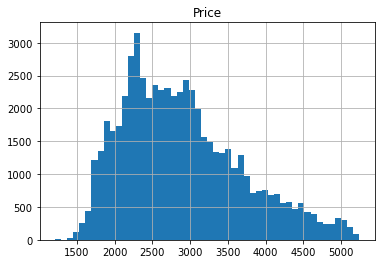

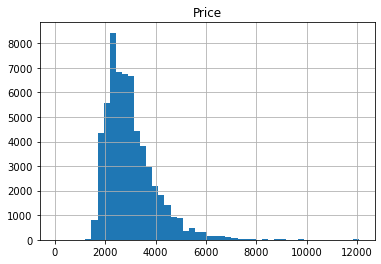

In [8]:
#Histogram and Outliers
q1 = df_predict['Price'].quantile(0.25)
q2 = df_predict['Price'].quantile(0.75)
iqr = q2-q1
iqr
rslt_df = df_predict[df_predict['Price'] > (q1 - 1.5 * iqr)]
rslt_df = rslt_df[rslt_df['Price'] < (q2 + 1.5 * iqr)]

#q3 = rslt_df['sq.ft'].quantile(0.25)
#q4 = rslt_df['sq.ft'].quantile(0.75)
#iqr2 = q3-q4

#new_df = rslt_df[rslt_df['sq.ft'] > (q3 - 1.5 * iqr)]
#new_df = new_df[new_df['sq.ft'] < (q4 + 1.5 * iqr)]


print('Entries in df_predict: ',len(df_predict))    
print('Entries in rslt_df: ',len(rslt_df))

rslt_df.hist(column = 'Price', bins = 50)
df_predict.hist(column = 'Price', bins = 50)

In [9]:
#Train and Test Division
msk = np.random.rand(len(rslt_df)) < 0.8
train = rslt_df[msk]
test = rslt_df[~msk]

msk2 = np.random.rand(len(df_predict)) < 0.8
train2 = df_predict[msk2]
test2 = df_predict[~msk2]
print('Done')

Done


In [10]:
#Multivariate Regression
from sklearn import linear_model
x_cols = []
for i in rslt_df.columns:
    if i != 'Price':
        x_cols.append(i)
    #print(x_cols,'\n')
# multivariate Regressions     
regr = linear_model.LinearRegression()
x = np.asanyarray(train[x_cols])
y = np.asanyarray(train[['Price']])
regr.fit (x, y)
# The coefficients
print ('rslt_df Coefficients: ', regr.coef_, '\n')

regr2 = linear_model.LinearRegression() # df_predict numbers
x2 = np.asanyarray(train2[x_cols])
y2 = np.asanyarray(train2[['Price']])
regr2.fit (x2, y2)
# The coefficients
print ('df_predict Coefficients: ', regr2.coef_)

rslt_df Coefficients:  [[ 1.79680182e+02 -9.76637866e+00  1.41078958e+00  4.22498788e+01
  -7.78626639e-01  6.79352515e+01  2.94935362e+01  4.87132515e+01
   7.13991078e+01  5.63082902e+01  3.29148983e+02 -2.45938960e+02
  -2.55601077e+02  2.29251030e+01 -1.65167675e+02 -3.37157598e+01
   3.92838817e+02  5.77972597e+02  2.83226446e+00 -8.73709980e-02]] 

df_predict Coefficients:  [[ 2.28478969e+02  1.10094151e+01  1.71435075e+00  5.78401342e+01
  -1.02985892e+00  1.10987798e+02  5.01906706e+01  1.12456022e+02
   8.50868914e+01  5.58705261e+01  3.71789769e+02 -3.13461293e+02
  -3.27257130e+02  2.05976827e+01 -3.09335081e+02 -5.36610771e+01
   2.55989360e+02  3.00745520e+02  2.82717271e+00 -1.23663364e-01]]


In [11]:
# Multiavariate Regression Results
y_hat= regr.predict(test[x_cols])
x = np.asanyarray(test[x_cols])
y = np.asanyarray(test['Price'])
print('rslt_df results')
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))
print('Average Square Residual: ', np.mean((y_hat - y)**2 /len(rslt_df)))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y), '\n')

y_hat2= regr.predict(test2[x_cols])
x2 = np.asanyarray(test2[x_cols])
y2 = np.asanyarray(test2['Price'])
print('df_predict results')
print("Residual sum of squares: %.2f"
      % np.mean((y_hat2 - y2) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr2.score(x2, y2))
print('Average Square Residual: ', np.mean((y_hat2 - y2)**2 /len(df_predict)))

rslt_df results
Residual sum of squares: 955584.92
Average Square Residual:  16.444980460334843
Variance score: 0.54 

df_predict results
Residual sum of squares: 1473540.68
Variance score: 0.56
Average Square Residual:  24.42912974552073


In [12]:
#knn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [13]:
#rslt_df
X = rslt_df.drop(columns = ['Price'])
X = X[x_cols].values
y = rslt_df['Price'].values
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

#df_predict
X2 = df_predict.drop(columns = ['Price'])
X2 = X2[x_cols].values
y2 = df_predict['Price'].values
X2 = preprocessing.StandardScaler().fit(X2).transform(X2.astype(float))
print('Done')

Done


In [14]:

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print('rslt_df')
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

#df_predict
X2_train, X2_test, y2_train, y2_test = train_test_split( X2, y2, test_size=0.2, random_state=4)
print('\ndf_predict')
print ('Train set:', X2_train.shape,  y2_train.shape)
print ('Test set:', X2_test.shape,  y2_test.shape)

rslt_df
Train set: (46486, 20) (46486,)
Test set: (11622, 20) (11622,)

df_predict
Train set: (48255, 20) (48255,)
Test set: (12064, 20) (12064,)


In [15]:
#knn results

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k=5
i = 1

b_train = []
b_test = []
b2_train = []
b2_test = []

while i <= k:
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    neigh2 = KNeighborsClassifier(n_neighbors = i).fit(X2_train,y2_train)
    
    yhat = neigh.predict(X_test)
    yhat2 = neigh.predict(X2_test)
    
    b_train.append(metrics.accuracy_score(y_train, neigh.predict(X_train)))
    b_test.append(metrics.accuracy_score(y_test, yhat))
    b2_train.append(metrics.accuracy_score(y2_train, neigh2.predict(X2_train)))
    b2_test.append(metrics.accuracy_score(y2_test, yhat2))
    i+=1
    #print(k)
    #print(b_train)
print('rslt_df')
print("Train set Accuracy: ", b_train[b_test.index(max(b_test))])
print("Test set Accuracy: ", max(b_test))

print('\ndf_predict')
print("Train set Accuracy: ", b2_train[b2_test.index(max(b2_test))])
print("Test set Accuracy: ", max(b2_test))

rslt_df
Train set Accuracy:  0.5562104719700555
Test set Accuracy:  0.226294957838582

df_predict
Train set Accuracy:  0.5598590819604186
Test set Accuracy:  0.3869363395225464


In [16]:
#Decision Tree Setup
from sklearn.tree import DecisionTreeClassifier
Xd = rslt_df[x_cols].values
yd = rslt_df["Price"]

Xd2 = df_predict[x_cols].values
yd2 = df_predict["Price"]

X_trainset, X_testset, y_trainset, y_testset = train_test_split(Xd, yd, test_size=0.3, random_state=3)

X2_trainset, X2_testset, y2_trainset, y2_testset = train_test_split(Xd2, yd2, test_size=0.3, random_state=3)
print('Done')

Done


In [17]:
#Decision Tree Run
max_depth = 50
accu = []
accu2 = []
i = 1
while i <= max_depth:
    houseTree = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    houseTree2 = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    
    houseTree.fit(X_trainset,y_trainset)
    houseTree2.fit(X2_trainset,y2_trainset)
    
    predTree = houseTree.predict(X_testset)
    predTree2 = houseTree.predict(X2_testset)
    
    accu.append(metrics.accuracy_score(y_testset, predTree))
    accu2.append(metrics.accuracy_score(y2_testset, predTree2))
    i+=1

print('Done')

Done


In [18]:
#Decision Tree Results
print('rslt_df')
print("DecisionTrees's Accuracy: ", max(accu))
print('Tree Depth: ', accu2.index(max(accu2))+1)

print('df_predict')
print("DecisionTrees's Accuracy: ", max(accu2))
print('Tree Depth: ', accu2.index(max(accu2))+1)

rslt_df
DecisionTrees's Accuracy:  0.22795846956920782
Tree Depth:  23
df_predict
DecisionTrees's Accuracy:  0.47684571175950485
Tree Depth:  23
